Bien sûr ! La taille du modèle de réseau neuronal est un élément crucial dans l'apprentissage automatique. Elle fait référence au nombre de paramètres (ou poids) que le modèle doit apprendre pendant l'entraînement. Une taille de modèle plus grande peut permettre au réseau neuronal de capturer des relations plus complexes dans les données, mais cela peut également entraîner des exigences en matière de puissance de calcul et de ressources plus importantes.

Le choix de la taille du modèle dépend de plusieurs facteurs :

1. **Taille et complexité des données :** Des ensembles de données complexes ou massifs peuvent nécessiter des modèles plus grands pour capturer des motifs et des relations subtiles.

2. **Capacité de calcul :** Des modèles plus grands nécessitent souvent des ressources informatiques plus importantes en termes de puissance de calcul et de mémoire.

3. **Surajustement (overfitting) et sous-ajustement (underfitting) :** Un modèle trop petit risque de sous-ajuster les données (ne pas capturer suffisamment de complexité), tandis qu'un modèle trop grand peut surajuster les données d'entraînement (capturer trop de détails spécifiques aux données d'entraînement et ne pas généraliser correctement aux nouvelles données).

4. **Objectif de performance :** Selon les exigences de performance, il est nécessaire de trouver un équilibre entre la taille du modèle, sa précision et sa généralisation.

En pratique, le choix de la taille du modèle est souvent un compromis entre la complexité des données, les ressources disponibles et les performances souhaitées. Pour sélectionner la taille optimale du modèle :

1. **Analyser les données :** Comprendre la nature et la complexité des données peut aider à estimer le niveau de complexité nécessaire dans le modèle.

2. **Expérimentation :** Tester plusieurs tailles de modèle avec une validation croisée (cross-validation) ou en divisant l'ensemble de données en ensembles d'entraînement, de validation et de test. Cela permet d'évaluer les performances du modèle sur différentes tailles et de choisir celle qui offre le meilleur compromis entre la précision et la généralisation.

3. **Considérer les modèles pré-entraînés :** Dans certains cas, l'utilisation de modèles pré-entraînés peut être bénéfique pour éviter de créer un modèle à partir de zéro et réduire les besoins en taille.

4. **Techniques de régularisation :** Utiliser des techniques de régularisation telles que la diminution du taux d'apprentissage, l'abandon (dropout) ou la régularisation L1/L2 peut aider à contrôler le surajustement dans les modèles plus grands.

En résumé, choisir la taille du modèle adaptée nécessite une compréhension approfondie des données, des tests expérimentaux et une évaluation attentive pour trouver un équilibre entre la capacité du modèle, les performances et les ressources disponibles.

In [1]:
import numpy as np
from torchvision import datasets
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [2]:

device = "cuda" if torch.cuda.is_available() else "cpu"

data_folder = '~/data/FMNIST' # This can be any directory you want
# to download FMNIST to
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)
tr_images = fmnist.data
tr_targets = fmnist.targets

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:

class MLP(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MLP, self).__init__()
        layers = []
        if len(hidden_sizes) > 0:
            # Add input layer
            layers.append(nn.Linear(input_size, hidden_sizes[0]))
            layers.append(nn.ReLU())  # Activation function

            # Add hidden layers
            for i in range(len(hidden_sizes) - 1):
                layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
                layers.append(nn.ReLU())  # Activation function

            # Add output layer
            layers.append(nn.Linear(hidden_sizes[-1], output_size))
        else:
            # If no hidden layers specified
            layers.append(nn.Linear(input_size, output_size))

        # Combine all layers
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

In [5]:
# Define hyperparameters
input_size = 28 * 28  # Fashion MNIST image size
num_classes = 10



In [6]:
# Define hyperparameters
learning_rate = 0.001
num_epochs = 10

criterion = nn.CrossEntropyLoss()


In [7]:
transform = transforms.Compose([
    transforms.ToTensor(),
])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [8]:
# Initialisation des listes pour stocker les valeurs d'exactitude (accuracy)
valeurs_exactitude_train =  {u:[] for u in range(2)}
valeurs_exactitude_val = {u:[] for u in range(2)}

In [9]:
for train_idx,hidden_sizes in enumerate([[],[512,512,512]]):

  # Define the transformation to apply to the dataset


  print('------------Hidden Size ',hidden_sizes,' -------------')


  trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
  testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)




  # Initialize the model, loss function, and optimizer
  model = MLP(input_size, hidden_sizes, num_classes).cuda()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # Entraînement du modèle
  for epoch in range(num_epochs):
      model.train()
      running_loss = 0.0
      correct_train = 0
      total_train = 0
      for i, data in enumerate(trainloader, 0):
          inputs, labels = data
          inputs, labels =inputs.cuda().float(), labels.cuda()
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          _, predicted = torch.max(outputs.data, 1)
          total_train += labels.size(0)
          correct_train += (predicted == labels).sum().item()

      exactitude_train = 100 * correct_train / total_train
      valeurs_exactitude_train[train_idx].append(exactitude_train)

      # Validation
      model.eval()
      correct_val = 0
      total_val = 0
      with torch.no_grad():
          for data in testloader:
              images, labels = data
              images, labels =images.cuda().float(), labels.cuda()
              outputs = model(images)
              _, predicted = torch.max(outputs.data, 1)
              total_val += labels.size(0)
              correct_val += (predicted == labels).sum().item()

      exactitude_val = 100 * correct_val / total_val
      valeurs_exactitude_val[train_idx].append(exactitude_val)

      print(f"Époque [{epoch+1}/{num_epochs}] - Perte : {running_loss / len(trainloader):.4f} - Exactitude Entraînement : {exactitude_train:.2f}% - Exactitude Validation : {exactitude_val:.2f}%")




------------Hidden Size  []  -------------
Époque [1/10] - Perte : 0.5946 - Exactitude Entraînement : 80.23% - Exactitude Validation : 82.64%
Époque [2/10] - Perte : 0.4600 - Exactitude Entraînement : 84.42% - Exactitude Validation : 83.60%
Époque [3/10] - Perte : 0.4348 - Exactitude Entraînement : 85.05% - Exactitude Validation : 83.82%
Époque [4/10] - Perte : 0.4216 - Exactitude Entraînement : 85.53% - Exactitude Validation : 84.15%
Époque [5/10] - Perte : 0.4123 - Exactitude Entraînement : 85.77% - Exactitude Validation : 84.29%
Époque [6/10] - Perte : 0.4073 - Exactitude Entraînement : 85.92% - Exactitude Validation : 83.51%
Époque [7/10] - Perte : 0.4019 - Exactitude Entraînement : 86.02% - Exactitude Validation : 84.19%
Époque [8/10] - Perte : 0.3977 - Exactitude Entraînement : 86.24% - Exactitude Validation : 84.07%
Époque [9/10] - Perte : 0.3946 - Exactitude Entraînement : 86.26% - Exactitude Validation : 84.77%
Époque [10/10] - Perte : 0.3913 - Exactitude Entraînement : 86.38%

In [10]:
inputs.shape

torch.Size([32, 1, 28, 28])

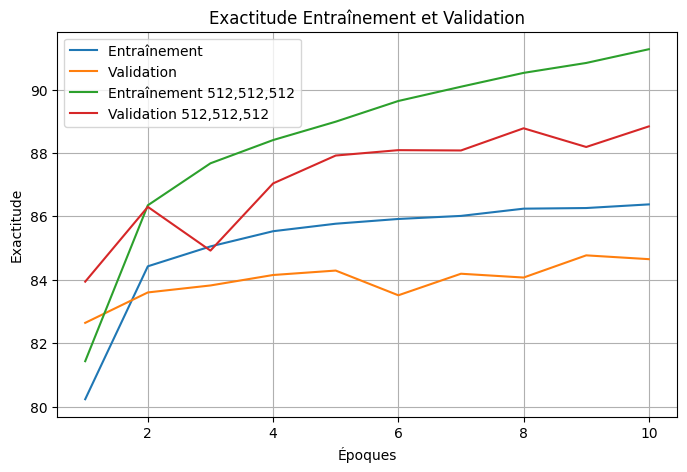

In [11]:
plt.figure(figsize=(8, 5))
for idx_u,u in enumerate(['','512,512,512']):
  # Tracé de l'exactitude à chaque époque pour les ensembles d'entraînement et de validation

  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_train[idx_u], label='Entraînement '+u)
  plt.plot(range(1, num_epochs + 1), valeurs_exactitude_val[idx_u], label='Validation '+u)
plt.xlabel('Époques')
plt.ylabel('Exactitude')
plt.title('Exactitude Entraînement et Validation')
plt.legend()
plt.grid(True)
plt.show()